In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


df = pd.read_csv(r"C:\Users\Asani\Python\Cleaned_data")
del df["Unnamed: 0"]
print(df)

      AGE  Urea     Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0    50.0   4.7   46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1    26.0   4.5   62.0    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2    50.0   4.7   46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3    50.0   4.7   46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4    33.0   7.1   46.0    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N
..    ...   ...    ...    ...   ...  ...  ...  ...   ...   ...   ...
989  64.0   8.8  106.0    8.5   5.9  2.1  1.2  4.0   1.2  32.0     Y
990  75.0  10.3  113.0    8.6   4.2  1.6  0.9  2.6   0.7  32.0     Y
991  58.0   4.0   55.0    7.9   4.9  2.0  1.2  1.4   1.1  35.0     Y
992  57.0   4.1   70.0    9.3   5.3  3.3  1.0  1.4   1.3  29.0     Y
993  55.0   4.1   34.0   13.9   5.4  1.6  1.6  3.1   0.7  33.0     Y

[994 rows x 11 columns]


## Membagi data Set menjadi 2 yaitu dependen dan independen

In [8]:
X = df.iloc[:,0:10]
Y = df.iloc[:,-1]

## Melakukan klasifikasi dan melihat Nilai dari setiap kolom

In [9]:
model = ExtraTreesClassifier()

model.fit(X,Y)

print(model.feature_importances_)

[0.11971861 0.03090991 0.03010247 0.30081278 0.06589685 0.05788475
 0.03314832 0.03600855 0.04517209 0.28034567]


## Memvisualisasi 10 kolom yang mempunyai nilai feature_importances_ tertinggi

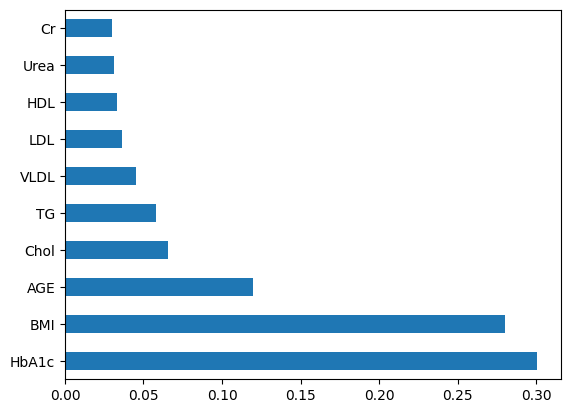

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

## Melakukan Normalisasi data menggunakan fungsi log dari numpy

In [26]:
Col_Normalisation = ["Urea","VLDL", "LDL", "HDL", "TG","Cr","BMI"]
log_data = np.log(df[Col_Normalisation])

# tampilkan data awal dan hasil log transformation
print("Data awal:\n", df[Col_Normalisation])
print("Hasil log transformation:\n", log_data)

Data awal:
      Urea  VLDL  LDL  HDL   TG     Cr   BMI
0     4.7   0.5  1.4  2.4  0.9   46.0  24.0
1     4.5   0.6  2.1  1.1  1.4   62.0  23.0
2     4.7   0.5  1.4  2.4  0.9   46.0  24.0
3     4.7   0.5  1.4  2.4  0.9   46.0  24.0
4     7.1   0.4  2.0  0.8  1.0   46.0  21.0
..    ...   ...  ...  ...  ...    ...   ...
989   8.8   1.2  4.0  1.2  2.1  106.0  32.0
990  10.3   0.7  2.6  0.9  1.6  113.0  32.0
991   4.0   1.1  1.4  1.2  2.0   55.0  35.0
992   4.1   1.3  1.4  1.0  3.3   70.0  29.0
993   4.1   0.7  3.1  1.6  1.6   34.0  33.0

[994 rows x 7 columns]
Hasil log transformation:
          Urea      VLDL       LDL       HDL        TG        Cr       BMI
0    1.547563 -0.693147  0.336472  0.875469 -0.105361  3.828641  3.178054
1    1.504077 -0.510826  0.741937  0.095310  0.336472  4.127134  3.135494
2    1.547563 -0.693147  0.336472  0.875469 -0.105361  3.828641  3.178054
3    1.547563 -0.693147  0.336472  0.875469 -0.105361  3.828641  3.178054
4    1.960095 -0.916291  0.693147 -0.22

## Visualisasi kolom yang telah di normalisasikan

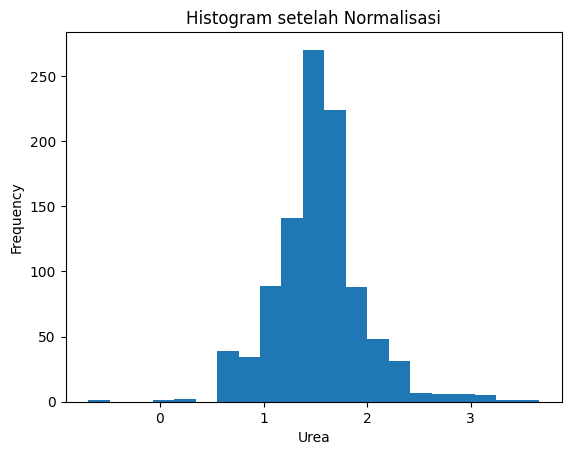

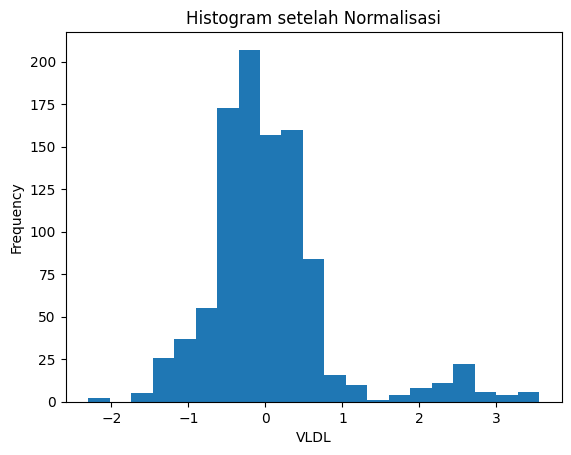

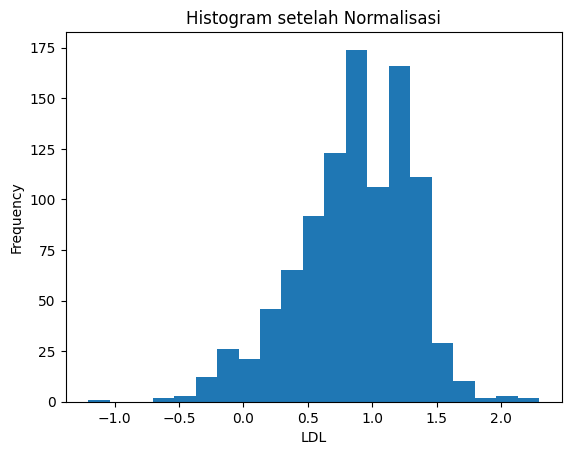

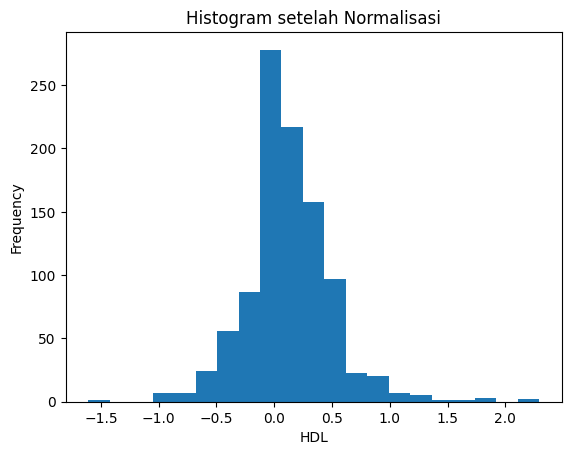

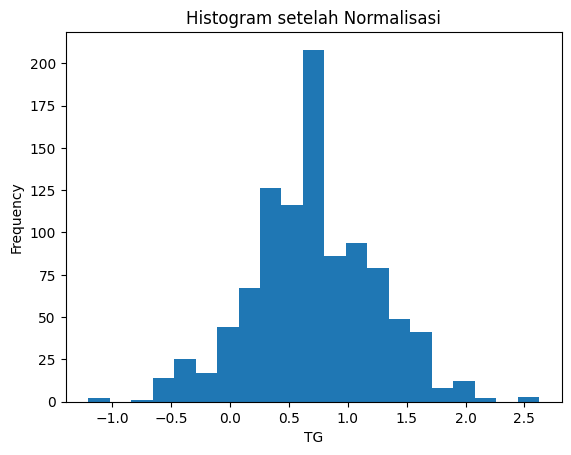

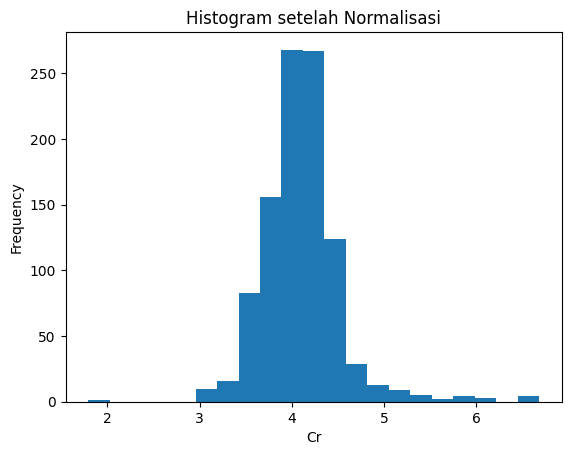

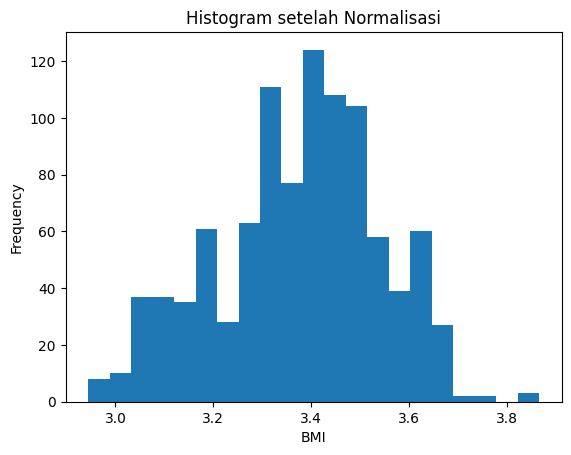

In [27]:
for col in log_data:
    plt.hist(log_data[col], bins=21)
    plt.title('Histogram setelah Normalisasi')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Visualisasi kolom menggunakan Box plot


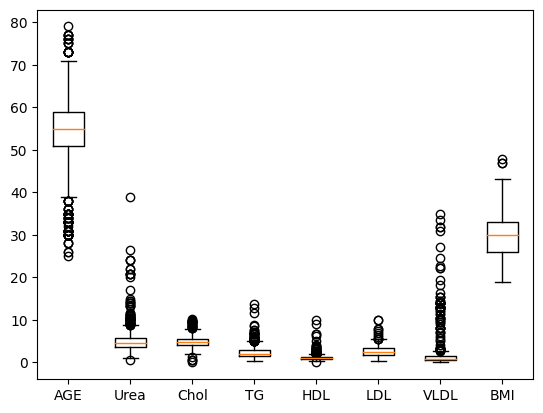

In [17]:
plt.boxplot([df.AGE,df.Urea,df.Chol, df.TG, df.HDL, df.LDL, df.VLDL, df.BMI],
             labels=["AGE","Urea","Chol","TG","HDL","LDL","VLDL","BMI"]);

## Melihat probabylity setiap kolom 

In [19]:
cols = ["Urea","TG","HDL","LDL","VLDL","BMI"]

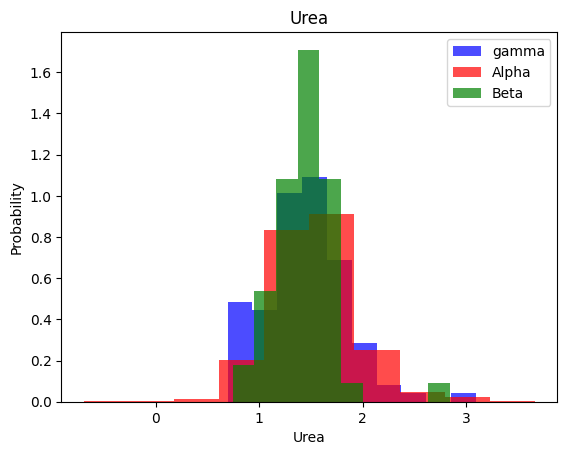

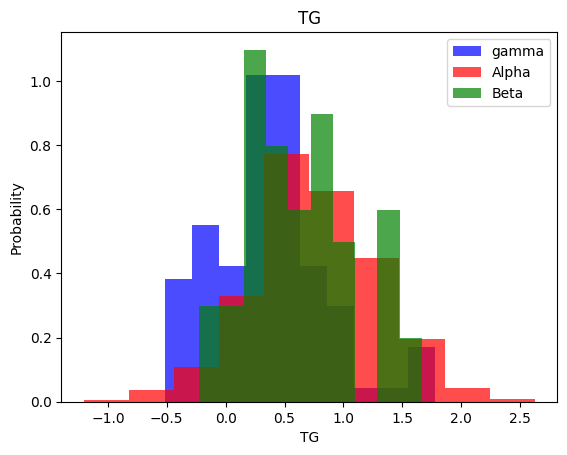

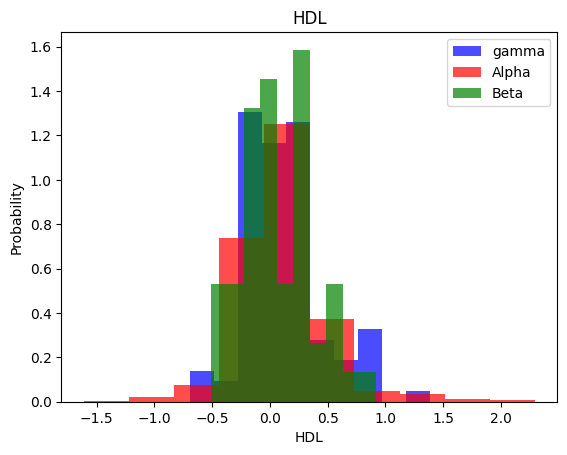

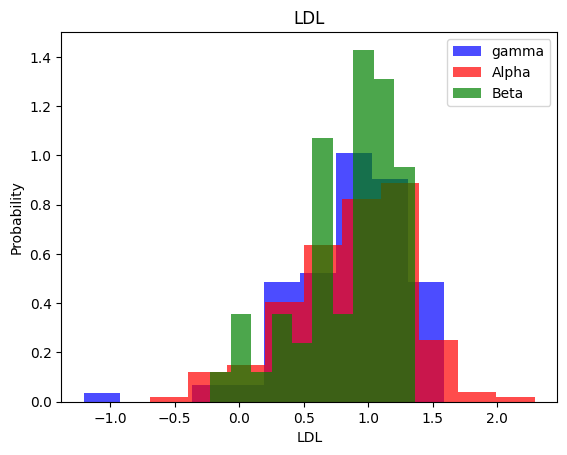

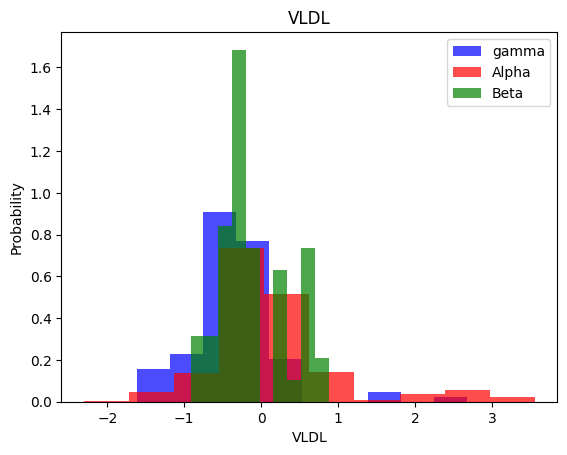

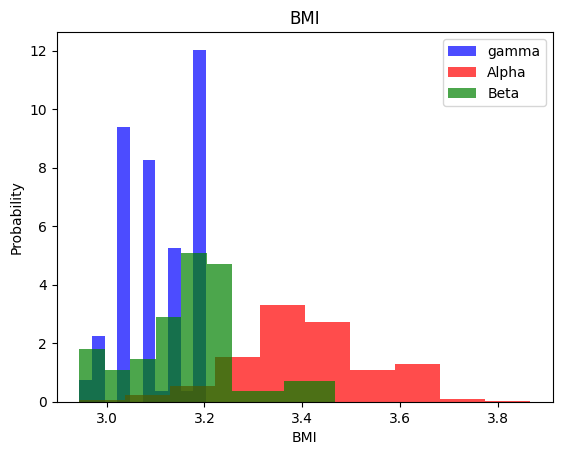

In [23]:
for label in cols:
    plt.hist(log_data[df["CLASS"]=="N"][label], color="b", label="gamma", alpha=0.7, density=True)
    plt.hist(log_data[df["CLASS"]=="Y"][label], color="r", label="Alpha", alpha=0.7, density=True)
    plt.hist(log_data[df["CLASS"]=="P"][label], color="g", label="Beta", alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

In [ ]:
df.describe()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,53.605634,5.129520,68.742455,8.286378,4.859678,2.343471,1.206187,2.610151,1.859054,29.598612
std,8.758101,2.948246,60.087902,2.542578,1.299625,1.399343,0.662212,1.116133,3.674106,4.963877
min,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.670000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000
